##### Perceptrón con conjuntos para entrenamiento y test:

In [3]:
import numpy as np
import random
import numpy.random
import matplotlib.pyplot as plt
%matplotlib inline
import math

def perc_converge (x, eta):
    
    w = np.zeros(len(x[0])-1)
    n = 0 # n es el índice de modificación'
    mod_w = np.array(w.copy())
    
    converge = False
    while converge == False:
        converge = True
        for i in range(0,len(x)):
            pp = x[i,3]*np.dot(w,x[i,0:3]) # No funciona con x[i][3] porque esa forma es para llamar listas, NO ARREGLOS 
            if pp <= 0:
                w = w + eta*(x[i,3])*(x[i,0:3])
                n+=1
                mod_w = np.vstack([mod_w,w])
                #for j in range(0, len(x[0])):
                    #w[j] = w[j] + eta*(y[i]*x[i][j])
                converge = False
                print('i =',i,'n:',n,'pp:',pp,' w:',w)
            else:
                print('pp:',pp)
                
                #mod_w = mod_w.append(w)
                #print ('modificaciones w: ', mod_w) #muestra las modoficaciones de w guardadas en mod_w
                
            
    #x2=[w[0], w[1], -w[1], w[0]]
    #x3=[w[0], w[1], w[1], -w[0]]
    #x2x3= np.array([x2, x3])
    #print ('W[x]=: ')
    #print(x2x3)
    
    return mod_w

In [4]:
obs_1 = 100 # Número de puntos por clase
obs_2 = 100

# numpy.random.multivariate_normal(mean, cov[, size, check_valid, tol])

clase_0 = np.random.multivariate_normal([0,0], [[1.,.95],[.95,1.]], size=obs_1)
clase_1 = np.random.multivariate_normal([1,5], [[1.,.85],[.85,1.]], size=obs_2)

[1.]
1.0
[ 1.         -1.22513782]
[ 1.         -1.65084657 -1.22513782]
<class 'numpy.ndarray'>
80
20
80
20
(80, 4)
(20, 4)
(80, 4)
(20, 4)
(160, 4)
(40, 4)


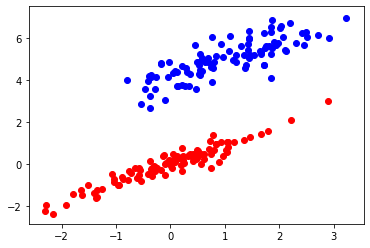

In [5]:
x = []
for i in range(obs_1):
    x = x+[[1]+[clase_0[i][0]]+[clase_0[i][1]]+[1]]
for i in range(obs_2):
    x = x+[[1]+[clase_1[i][0]]+[clase_1[i][1]]+[-1]]

x = np.array(x)
print(x[i,[3]])   # Imprime en un arreglo el valor del arreglo 'i', columna 3
print(x[i,3])     # Imprime solamente el valor del arreglo 'i', columna 3
print(x[i,[0,2]]) # Imprime las columnas solicitadas (1 y 2) del renglón i del arreglo x
print(x[i,0:3])   # Imprime de la columna 0 a la 3 del renglón i del arreglo x
print(type(x[i,[3]]))


#Permuta aleatoriamente renglones de x
# x = np.random.permutation(x)

data1 = obs_1
data2 = obs_2
prcent1 = 0.8
prcent2 = 1-prcent1

train_1 = math.floor(data1*(prcent1))
test_1 = data1-train_1
train_2 = math.floor(data2*(prcent1))
test_2 = data2-train_2


print(train_1)
print(test_1)
print(train_2)
print(test_2)


x_train_p1_r = x[0:train_1,:]
x_test_r = x[train_1:data1,:]
x_train_p2_a = x[data1:(data1+train_2),:]
x_test_a = x[(data1+train_2):(data1+data2),:]
print(x_train_p1_r.shape)
print(x_test_r.shape)
print(x_train_p2_a.shape)
print(x_test_a.shape)
x_train = np.vstack([x_train_p1_r,x_train_p2_a])
x_test = np.vstack([x_test_r,x_test_a])
print(x_train.shape)
print(x_test.shape)


plt.scatter(clase_0[:,0], clase_0[:,1], color='red')
plt.scatter(clase_1[:,0], clase_1[:,1], color='blue')

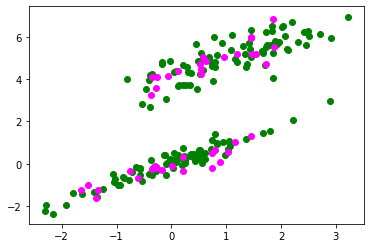

In [6]:
plt.scatter(x_train[:,1], x_train[:,2], color='green')
plt.scatter(x_test[:,1], x_test[:,2], color='magenta')

In [7]:
eta = 0.5
Ws = perc_converge(x_train, eta)

print(Ws)

i = 0 n: 1 pp: 0.0  w: [0.5        0.21112893 0.05883022]
pp: 0.2758906150347906
pp: 1.285379270059786
pp: 0.6133842627526008
pp: 0.9724441297996202
pp: 0.43094827874754166
pp: 0.784925516720707
pp: 0.5001074111918078
pp: 0.7727698345312379
pp: 0.7576222071768569
pp: 0.6461243676894207
pp: 0.42005942039774435
pp: 0.5980760427845275
pp: 0.6356545478693013
pp: 0.8543063661173861
pp: 0.7481003880045469
pp: 0.038917499894270485
pp: 0.12175835905523559
pp: 0.16511633911587703
pp: 0.3233910089929452
pp: 0.5145638439670107
pp: 0.5208579088112658
pp: 0.5567148309078986
pp: 0.6484251026303283
pp: 0.5220854978419727
i = 25 n: 2 pp: -0.12014390920589169  w: [ 1.         -0.94397782 -1.06636515]
pp: 0.8119658036659622
pp: 0.24867510780987068
pp: 1.907919944603759
i = 29 n: 3 pp: -0.7990111552205602  w: [ 1.5        -0.52379834 -0.59479548]
pp: 4.03385868520536
pp: 0.49197478507869385
pp: 1.7988304854695434
pp: 2.3695579513108296
pp: 1.772500434755423
pp: 0.9398609661490622
pp: 1.4402485965098701
p

In [8]:
# Intervalo de la extensión de los puntos de ambas clases
mx = max(x[:,1])
mn = min(x[:,1])
print(mn,mx)

-2.3102135052633717 3.2217490831683318


w [[ 0.          0.          0.        ]
 [ 0.5         0.21112893  0.05883022]
 [ 1.         -0.94397782 -1.06636515]
 [ 1.5        -0.52379834 -0.59479548]
 [ 2.          0.31148348  0.124164  ]
 [ 1.5        -0.51964812 -2.53654699]
 [ 2.          0.92550375 -1.04792   ]]


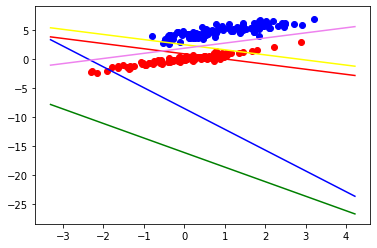

In [9]:
z = np.linspace(-1+mn,mx+1) #50 valores equidistantes de 0 a 1

'''k = np.zeros(len(z)) #arreglo del tamaño de x con entradas 0
k0 = np.zeros(50)'''

w1=Ws[1] #  renombramos al 1ro elemento del arreglo Ws (obtenido de la FUNCIÓN perc_converge) como w1
w2=Ws[2] # renombramos al 2do elemento del arreglo Ws (obtenido de la FUNCIÓN perc_converge) como w2
w3=Ws[3] #  renombramos al 3ro elemento del arreglo Ws (obtenido de la FUNCIÓN perc_converge) como w3
w4=Ws[4] # renombramos al 4to elemento del arreglo Ws (obtenido de la FUNCIÓN perc_converge) como w4
w_1=Ws[-1] #  renombramos al último elemento del arreglo Ws (obtenido de la FUNCIÓN perc_converge) como w_1



print('w',Ws)

k1 = -(w1[0]+w1[1]*z)/w1[2] # RECTA asociada al 2do arreglo de Ws usando la ecuación:    y = -(c+a*x) / b
k2 = -(w2[0]+w2[1]*z)/w2[2] # RECTA asociada al 3er arreglo de Ws usando la ecuación: y = -(c+a*x) / b
k3 = -(w3[0]+w3[1]*z)/w3[2] # RECTA asociada al 4to arreglo de Ws usando la ecuación:    y = -(c+a*x) / b
k4 = -(w4[0]+w4[1]*z)/w4[2] # RECTA asociada al 5to arreglo de Ws usando la ecuación: y = -(c+a*x) / b
k_1 = -(w_1[0]+w_1[1]*z)/w_1[2] # RECTA asociada al último arreglo de Ws usando la ecuación:    y = -(c+a*x) / b

'''print('x= ')
print(z)
print('y= ')
print(k)'''

plt.plot(z, k1,'-',color='blue')
plt.plot(z, k2,'-',color='red')
plt.plot(z, k3,'-',color='yellow')
plt.plot(z, k4,'-',color='green')
plt.plot(z, k_1,'-',color='violet')

plt.scatter(clase_0[:,0], clase_0[:,1], color='red')
plt.scatter(clase_1[:,0], clase_1[:,1], color='blue')

In [12]:
def perc_clasif(x_test):
    conj_mal = np.empty(3)#np.zeros(3)
    conj_bien = np.empty(3)#np.zeros(3)
    
    for i in range(0,len(x_test)):
            pp = x_test[i,3]*np.dot(Ws[-1] ,x_test[i,0:3])
            if pp <= 0:
                conj_mal = np.vstack([conj_mal,x_test[i,0:3]])
                print('elemento mal clasificado : ','i: ',i,'pp: ',pp)
            else:
                conj_bien = np.vstack([conj_bien,x_test[i,0:3]])
                print('elemento bien clasificado : ','i: ',i,'pp: ',pp)
    #return ('conj mal clasif: ',conj_mal,'conj bien clasif: ',conj_bien)
    return (conj_mal,conj_bien,conj_mal.shape,conj_bien.shape)

In [13]:
mal_clas = perc_clasif(x_test)

print(mal_clas)
#print(mal_clas.shape)

elemento bien clasificado :  i:  0 pp:  2.539462253015784
elemento bien clasificado :  i:  1 pp:  2.0509064207615153
elemento bien clasificado :  i:  2 pp:  2.0005396911165567
elemento bien clasificado :  i:  3 pp:  2.9100685557638615
elemento bien clasificado :  i:  4 pp:  1.9073445209940525
elemento bien clasificado :  i:  5 pp:  1.8521906775078696
elemento bien clasificado :  i:  6 pp:  1.6591296341850683
elemento bien clasificado :  i:  7 pp:  2.000690956576986
elemento bien clasificado :  i:  8 pp:  2.0630759079821175
elemento bien clasificado :  i:  9 pp:  2.386460994700987
elemento bien clasificado :  i:  10 pp:  2.1416966657681726
elemento bien clasificado :  i:  11 pp:  2.134211838185109
elemento bien clasificado :  i:  12 pp:  2.172306358136336
elemento bien clasificado :  i:  13 pp:  2.1804089147285572
elemento bien clasificado :  i:  14 pp:  1.8732847521937883
elemento bien clasificado :  i:  15 pp:  2.736636338858044
elemento bien clasificado :  i:  16 pp:  2.4385852802686